In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 10]

## Load the data

In [2]:
df = pd.read_csv("data/dataset_mood_smartphone.csv")

In [3]:
print(df.shape)
df.head()

(376912, 5)


,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0


In [4]:
df.variable.unique()

array(['mood', 'circumplex.arousal', 'circumplex.valence', 'activity',
       'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather'],
      dtype=object)

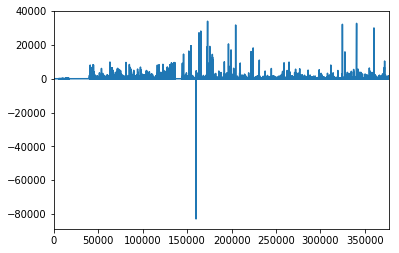

In [5]:
df.value.plot()

In [6]:
df[df.value < -2]

,Unnamed: 0,id,time,variable,value
150040,151512,AS14.02,2014-03-16 15:46:43.769,appCat.builtin,-44.689
159972,622771,AS14.07,2014-04-30 14:18:06.200,appCat.builtin,-82798.871


In [7]:
print(df.id.unique())
print(df.id.nunique())

['AS14.01' 'AS14.02' 'AS14.03' 'AS14.05' 'AS14.06' 'AS14.07' 'AS14.08'
 'AS14.09' 'AS14.12' 'AS14.13' 'AS14.14' 'AS14.15' 'AS14.16' 'AS14.17'
 'AS14.19' 'AS14.20' 'AS14.23' 'AS14.24' 'AS14.25' 'AS14.26' 'AS14.27'
 'AS14.28' 'AS14.29' 'AS14.30' 'AS14.31' 'AS14.32' 'AS14.33']
27


## Transforming 'variable' into feature columns

In [8]:
# new column for each feature
for feature in df['variable'].unique():
    df[feature] = df['value'][df['variable'] == feature]
df.rename(columns={
    'circumplex.arousal':'arousal',
    'circumplex.valence':'valence',
    'appCat.builtin':'builtin',
    'appCat.communication':'communication',
    'appCat.entertainment':'entertainment',
    'appCat.finance':'finance',
    'appCat.game':'game',
    'appCat.office':'office',
    'appCat.other':'other',
    'appCat.social':'social',
    'appCat.travel':'travel',
    'appCat.unknown':'unknown',
    'appCat.utilities':'utilities',
    'appCat.weather':'weather'}, inplace=True)
df.columns

Index(['Unnamed: 0', 'id', 'time', 'variable', 'value', 'mood', 'arousal',
       'valence', 'activity', 'screen', 'call', 'sms', 'builtin',
       'communication', 'entertainment', 'finance', 'game', 'office', 'other',
       'social', 'travel', 'unknown', 'utilities', 'weather'],
      dtype='object')

In [9]:
# transform to datetime
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')
df.head()

,Unnamed: 0,id,variable,value,mood,arousal,valence,activity,screen,call,...,entertainment,finance,game,office,other,social,travel,unknown,utilities,weather
time,,,,,,,,,,,,,,,,,,,,,
2014-02-26 13:00:00,1,AS14.01,mood,6.0,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-26 15:00:00,2,AS14.01,mood,6.0,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-26 18:00:00,3,AS14.01,mood,6.0,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-26 21:00:00,4,AS14.01,mood,7.0,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-27 09:00:00,5,AS14.01,mood,6.0,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# drop unnecessary variables
df = df.drop(['variable', 'value', 'Unnamed: 0'], axis=1)
df.head(10)

,id,mood,arousal,valence,activity,screen,call,sms,builtin,communication,entertainment,finance,game,office,other,social,travel,unknown,utilities,weather
time,,,,,,,,,,,,,,,,,,,,
2014-02-26 13:00:00,AS14.01,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-26 15:00:00,AS14.01,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-26 18:00:00,AS14.01,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-26 21:00:00,AS14.01,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-27 09:00:00,AS14.01,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-27 12:00:00,AS14.01,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-27 15:00:00,AS14.01,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-21 09:00:00,AS14.01,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-21 11:00:00,AS14.01,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# group data by id and resample to daily data
grouped = df.groupby('id').resample('D')

In [12]:
# custom aggregation function
aggs = {'mood': 'mean',
        'arousal': 'mean',
        'valence': 'mean',
        'activity': 'mean',
        'screen': 'sum',
        'call': 'sum',
        'sms': 'sum',
        'builtin': 'sum',
        'communication': 'sum',
        'entertainment': 'sum',
        'finance': 'sum',
        'game': 'sum',
        'office': 'sum',
        'other': 'sum',
        'social': 'sum',
        'travel': 'sum',
        'unknown': 'sum',
        'utilities': 'sum',
        'weather': 'sum'
       }
# aggregate each column to mean/sum value
df_daily = grouped.agg(aggs)

In [13]:
# just some testing
#df[df['id'] == 'AS14.01'].loc['2014-03-18']
#df_daily.index.get_level_values(0)
#df_daily.loc['AS14.01']

In [14]:
# how grouped & aggregated data looks like
df_daily.head(10)

mood  arousal  valence  activity  screen  call  sms  \
id      time                                                              
AS14.01 2014-02-17   NaN      NaN      NaN       NaN     0.0   2.0  0.0   
        2014-02-18   NaN      NaN      NaN       NaN     0.0   1.0  0.0   
        2014-02-19   NaN      NaN      NaN       NaN     0.0   7.0  2.0   
        2014-02-20   NaN      NaN      NaN       NaN     0.0   2.0  3.0   
        2014-02-21   NaN      NaN      NaN       NaN     0.0   0.0  1.0   
        2014-02-22   NaN      NaN      NaN       NaN     0.0   2.0  1.0   
        2014-02-23   NaN      NaN      NaN       NaN     0.0   0.0  0.0   
        2014-02-24   NaN      NaN      NaN       NaN     0.0   0.0  0.0   
        2014-02-25   NaN      NaN      NaN       NaN     0.0   3.0  0.0   
        2014-02-26  6.25    -0.25     0.75       NaN     0.0   1.0  2.0   

                    builtin  communication  entertainment  finance  game  \
id      time                                                               
AS14.01 2014-02-17      0.0            0.0            0.0      0.0   0.0   
        2014-02-18      0.0            0.0            0.0      0.0   0.0   
        2014-02-19      0.0            0.0            0.0      0.0   0.0   
        2014-02-20      0.0            0.0            0.0      0.0   0.0   
        2014-02-21      0.0            0.0            0.0      0.0   0.0   
        2014-02-22      0.0            0.0            0.0      0.0   0.0   
        2014-02-23      0.0            0.0            0.0      0.0   0.0   
        2014-02-24      0.0            0.0            0.0      0.0   0.0   
        2014-02-25      0.0            0.0            0.0      0.0   0.0   
        2014-02-26      0.0            0.0            0.0      0.0   0.0   

                    office  other  social  travel  unknown  utilities  weather  
id      time                                                                    
AS14.01 2014-02-17     0.0    0.0     0.0     0.0      0.0        0.0      0.0  
        2014-02-18     0.0    0.0     0.0     0.0      0.0        0.0      0.0  
        2014-02-19     0.0    0.0     0.0     0.0      0.0        0.0      0.0  
        2014-02-20     0.0    0.0     0.0     0.0      0.0        0.0      0.0  
        2014-02-21     0.0    0.0     0.0     0.0      0.0        0.0      0.0  
        2014-02-22     0.0    0.0     0.0     0.0      0.0        0.0      0.0  
        2014-02-23     0.0    0.0     0.0     0.0      0.0        0.0      0.0  
        2014-02-24     0.0    0.0     0.0     0.0      0.0        0.0      0.0  
        2014-02-25     0.0    0.0     0.0     0.0      0.0        0.0      0.0  
        2014-02-26     0.0    0.0     0.0     0.0      0.0        0.0      0.0

In [15]:
df_daily.reset_index(inplace=True)
df_daily.head()

,id,time,mood,arousal,valence,activity,screen,call,sms,builtin,...,entertainment,finance,game,office,other,social,travel,unknown,utilities,weather
0,AS14.01,2014-02-17,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AS14.01,2014-02-18,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AS14.01,2014-02-19,NaN,NaN,NaN,NaN,0.0,7.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AS14.01,2014-02-20,NaN,NaN,NaN,NaN,0.0,2.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AS14.01,2014-02-21,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df_daily.id.unique()

array(['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', 'AS14.07',
       'AS14.08', 'AS14.09', 'AS14.12', 'AS14.13', 'AS14.14', 'AS14.15',
       'AS14.16', 'AS14.17', 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24',
       'AS14.25', 'AS14.26', 'AS14.27', 'AS14.28', 'AS14.29', 'AS14.30',
       'AS14.31', 'AS14.32', 'AS14.33'], dtype=object)

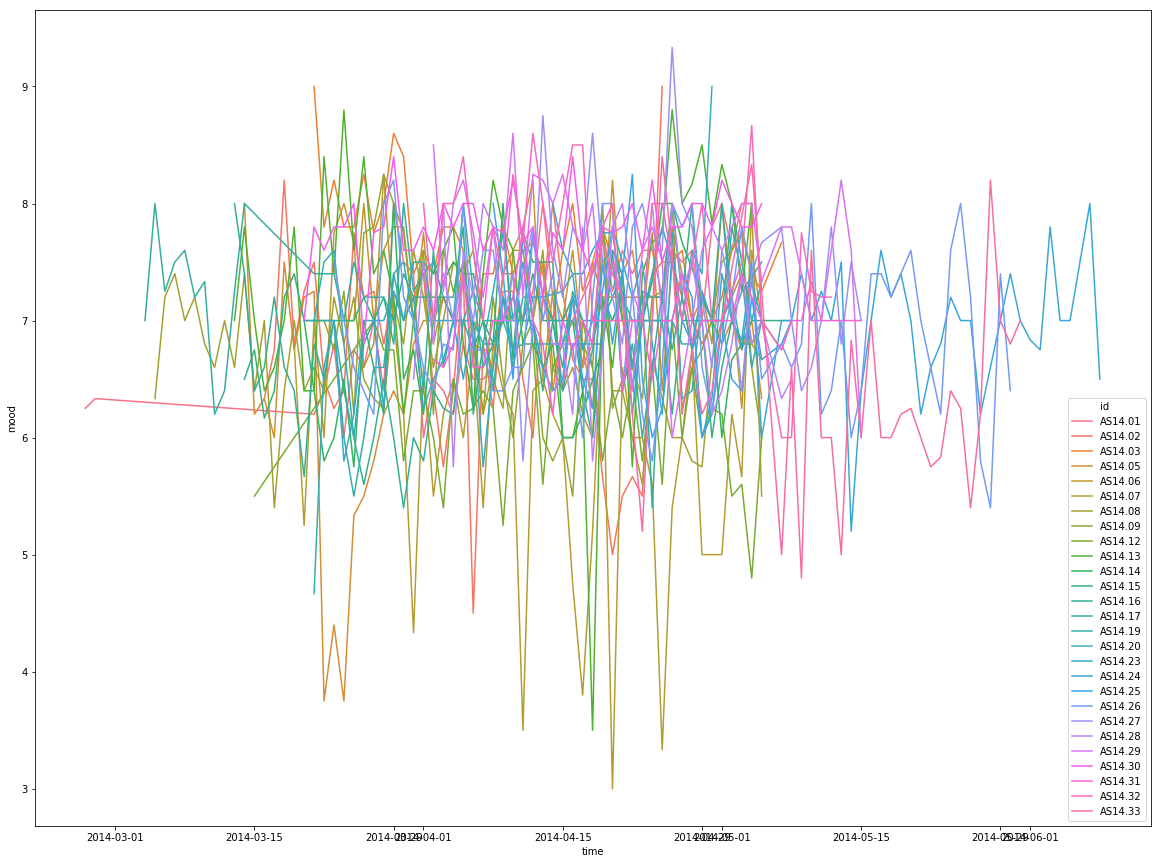

In [17]:
plt.rcParams['figure.figsize'] = [20, 15]

dates = df_daily['time'].dt.date.unique()
user_moods=sns.lineplot(x='time', y='mood', data=df_daily, hue='id')
#user_moods.set_xticklabels(user_moods.get_xticklabels(), rotation=10);

In [58]:
df_daily.shape

(2154, 21)

In [59]:
df_daily.mood.mean()

6.990063091482655

In [60]:
df_daily.mood.isna().sum()

886

In [26]:
df_daily.columns

Index(['id', 'time', 'mood', 'arousal', 'valence', 'activity', 'screen',
       'call', 'sms', 'builtin', 'communication', 'entertainment', 'finance',
       'game', 'office', 'other', 'social', 'travel', 'unknown', 'utilities',
       'weather'],
      dtype='object')

/Users/maaret/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/maaret/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


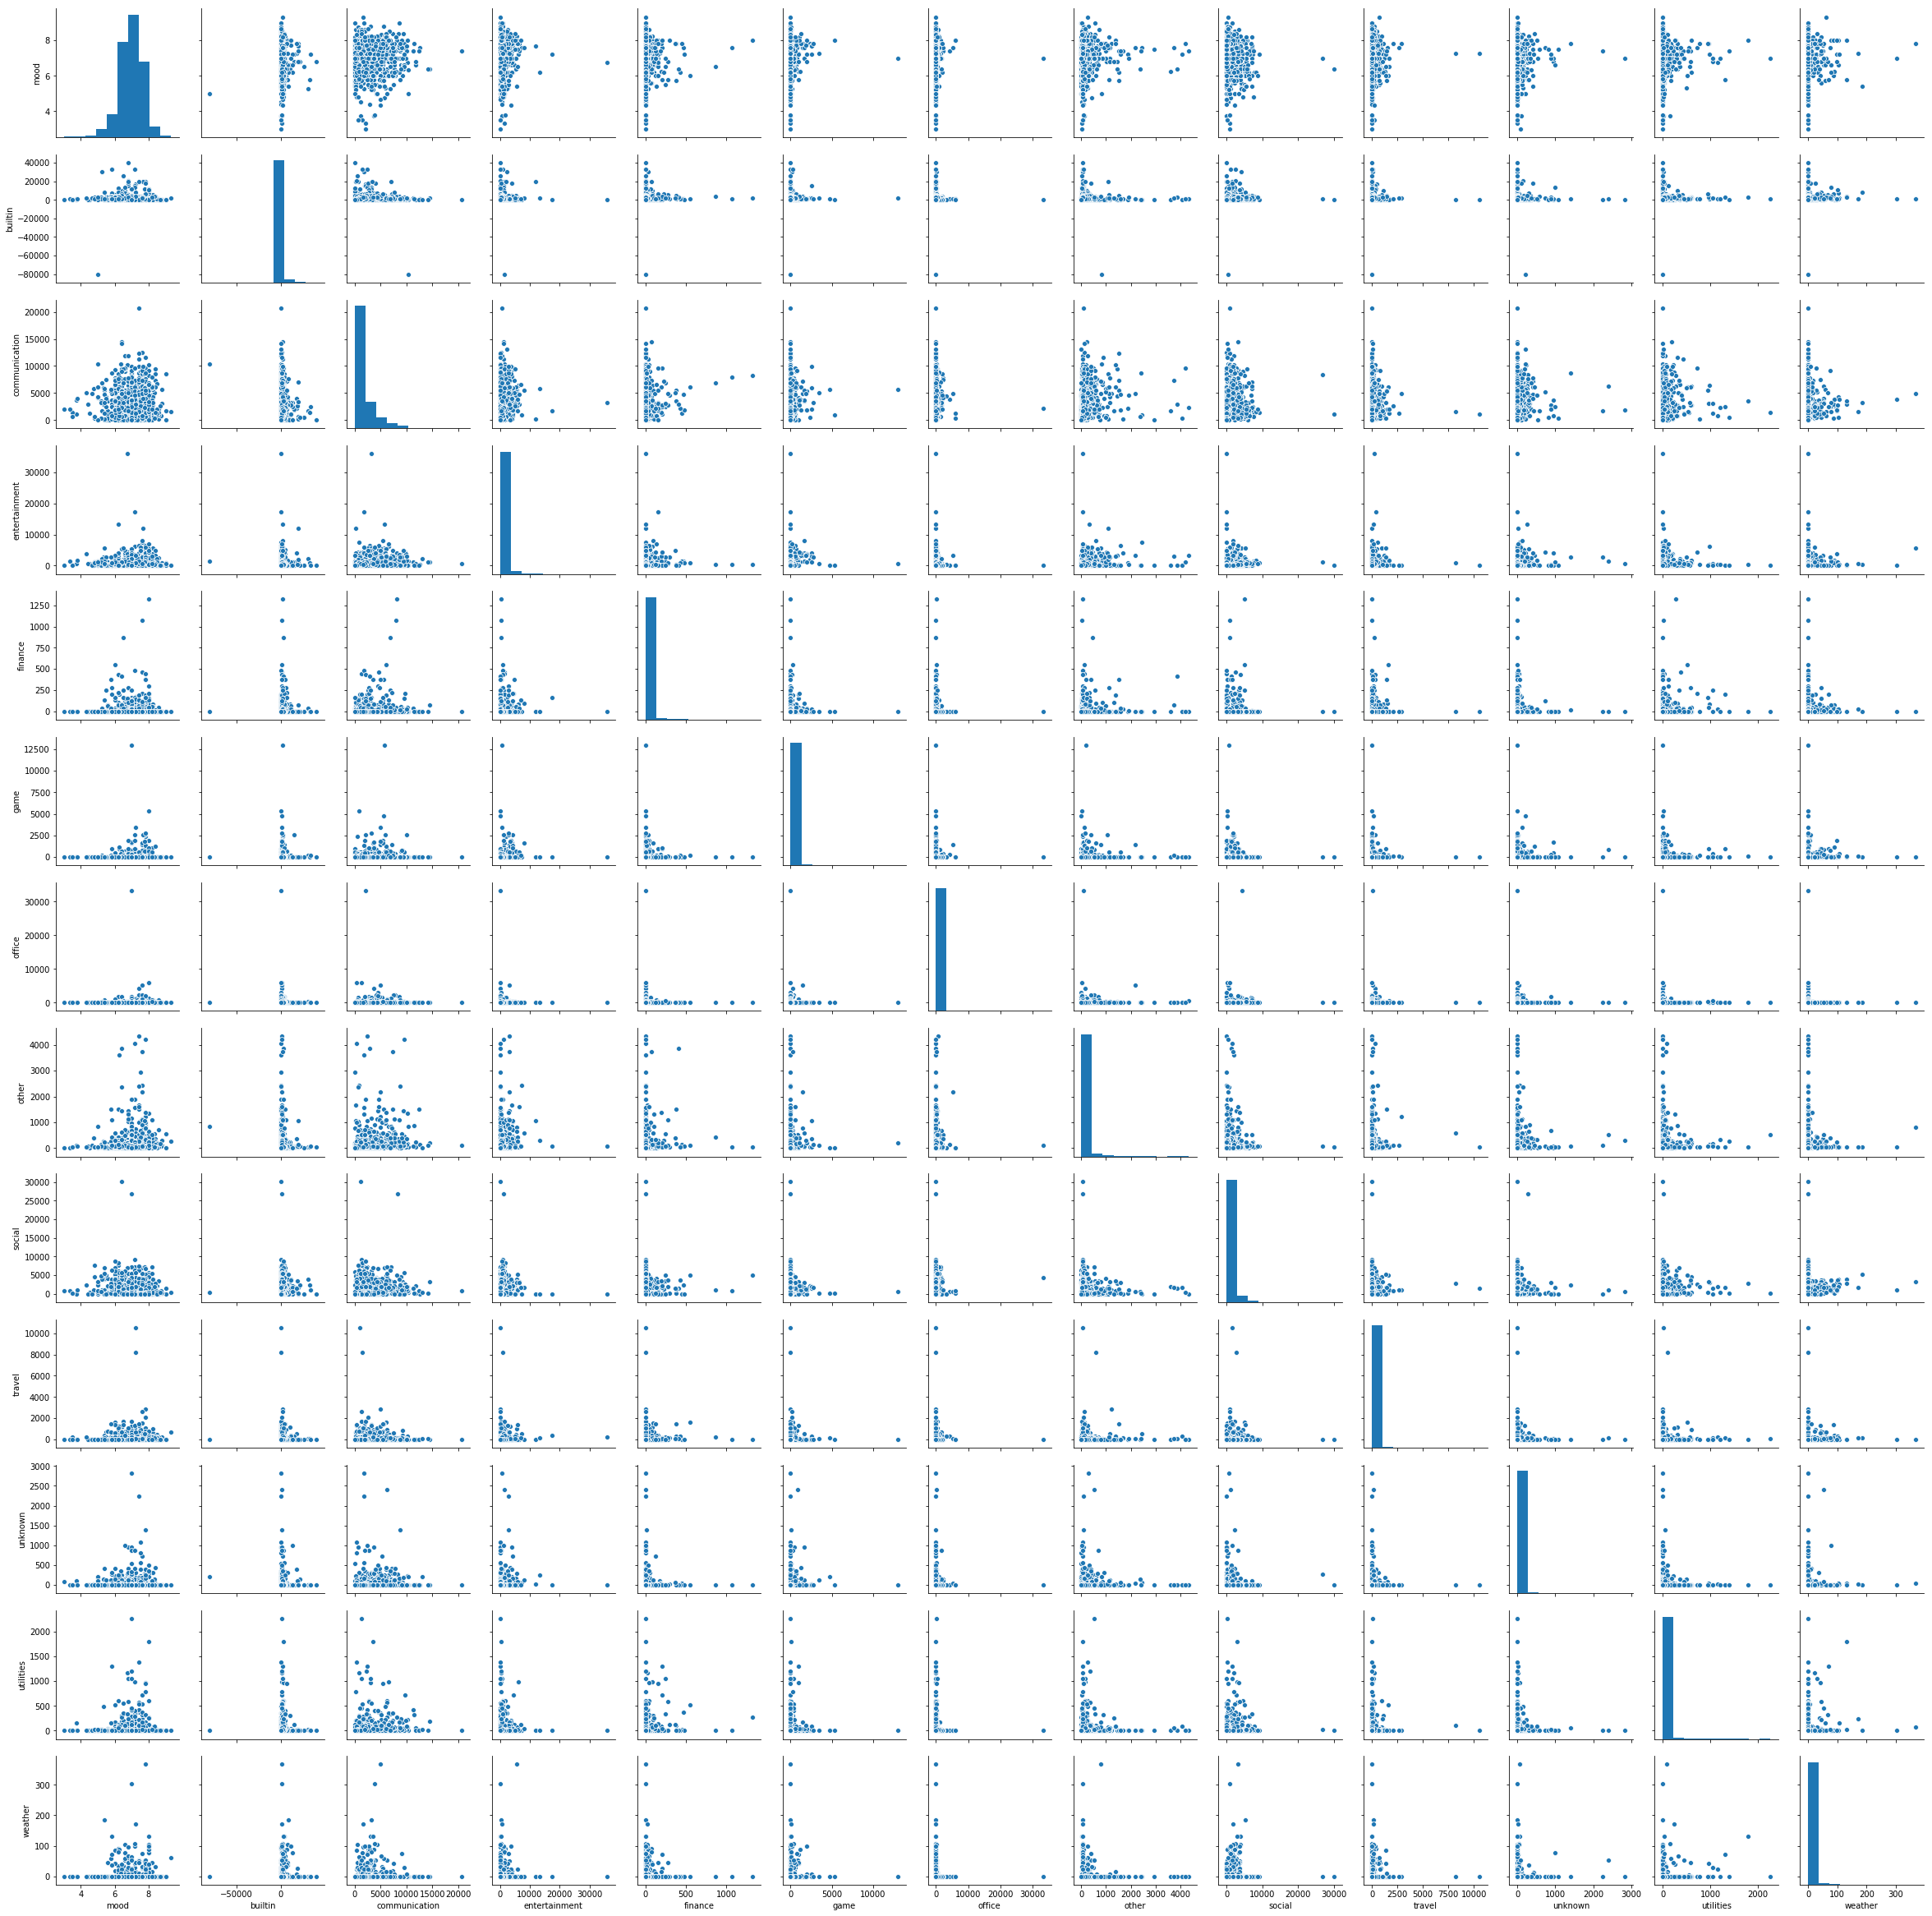

In [28]:
apps = ['mood', 'builtin', 'communication', 'entertainment', 'finance', 'game', 'office', 'other', 
        'social', 'travel', 'unknown', 'utilities', 'weather']
sns.pairplot(df_daily[apps])
#plt.savefig('scatter_matrix.png')

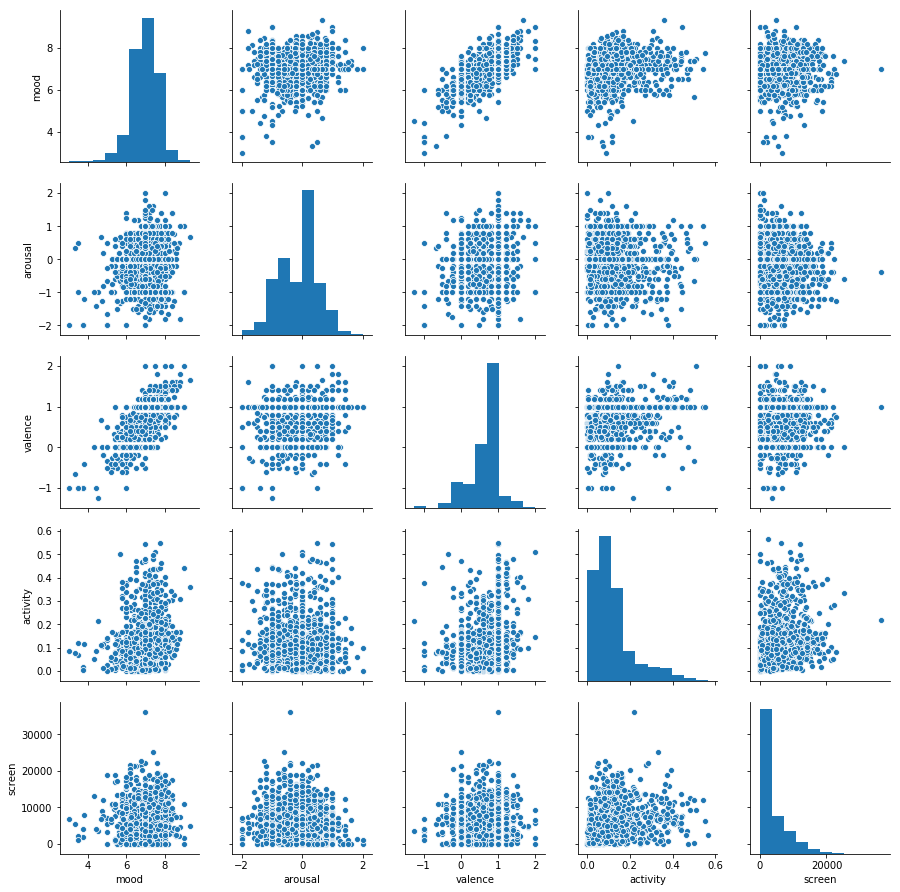

In [24]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.pairplot(df_daily[['mood', 'arousal', 'valence', 'activity', 'screen']])
plt.savefig('scatter_matrix.png')

## Plotting different variables against target 'mood'

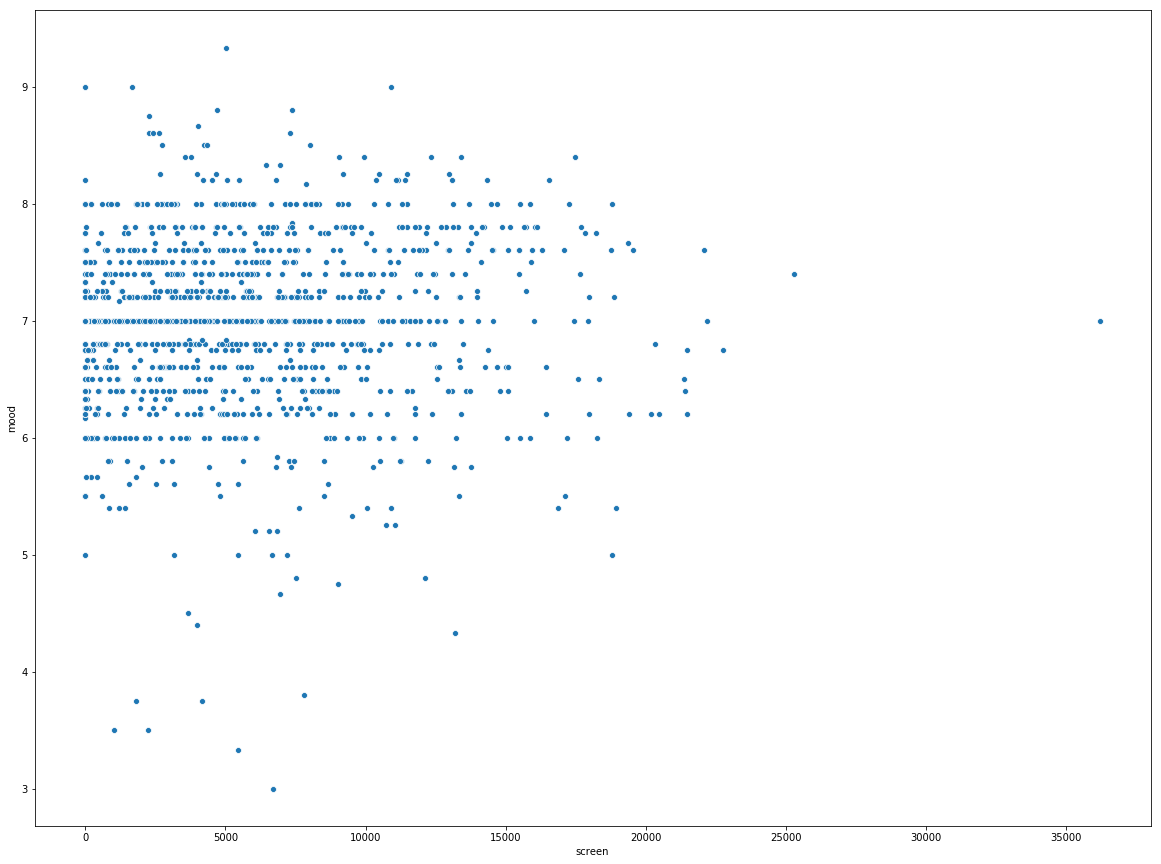

In [61]:
sns.scatterplot(x='screen', y='mood', data=df_daily)

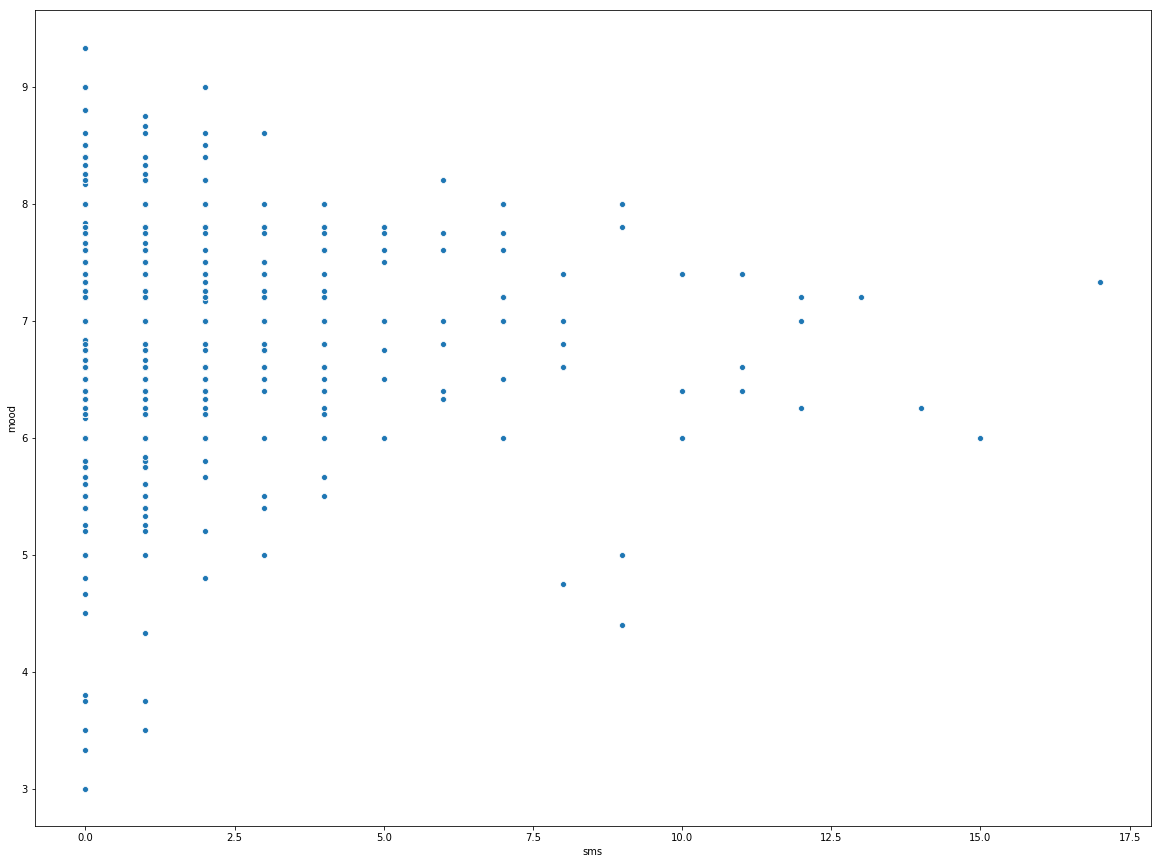

In [62]:
sns.scatterplot(x='sms', y='mood', data=df_daily)

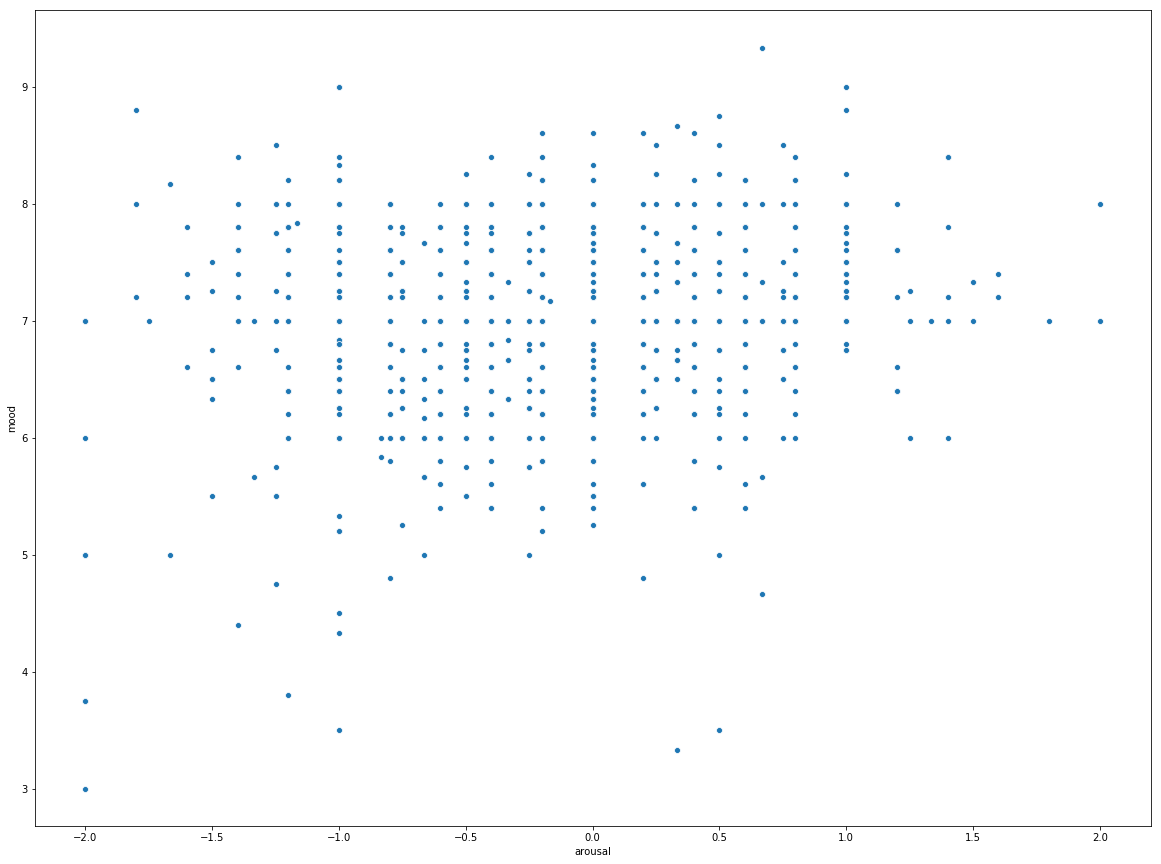

In [63]:
sns.scatterplot(x='arousal', y='mood', data=df_daily)

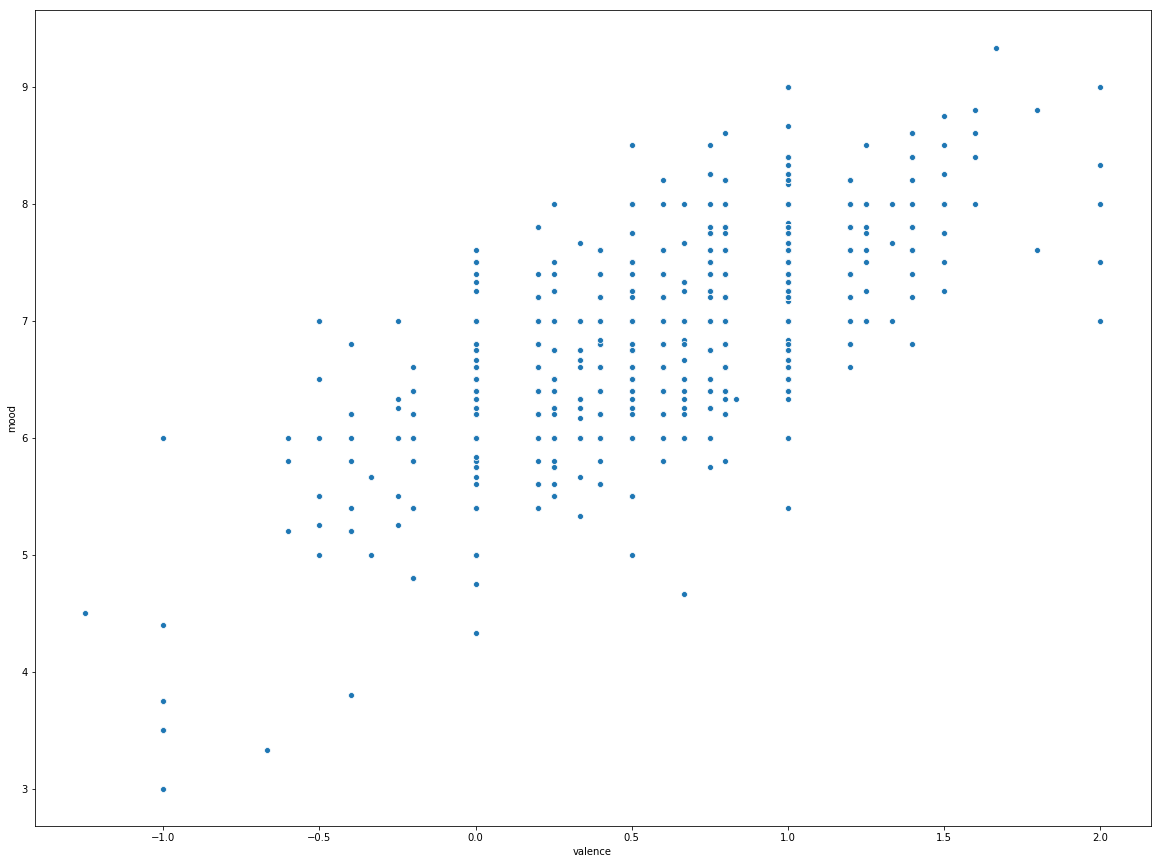

In [64]:
sns.scatterplot(x='valence', y='mood', data=df_daily)

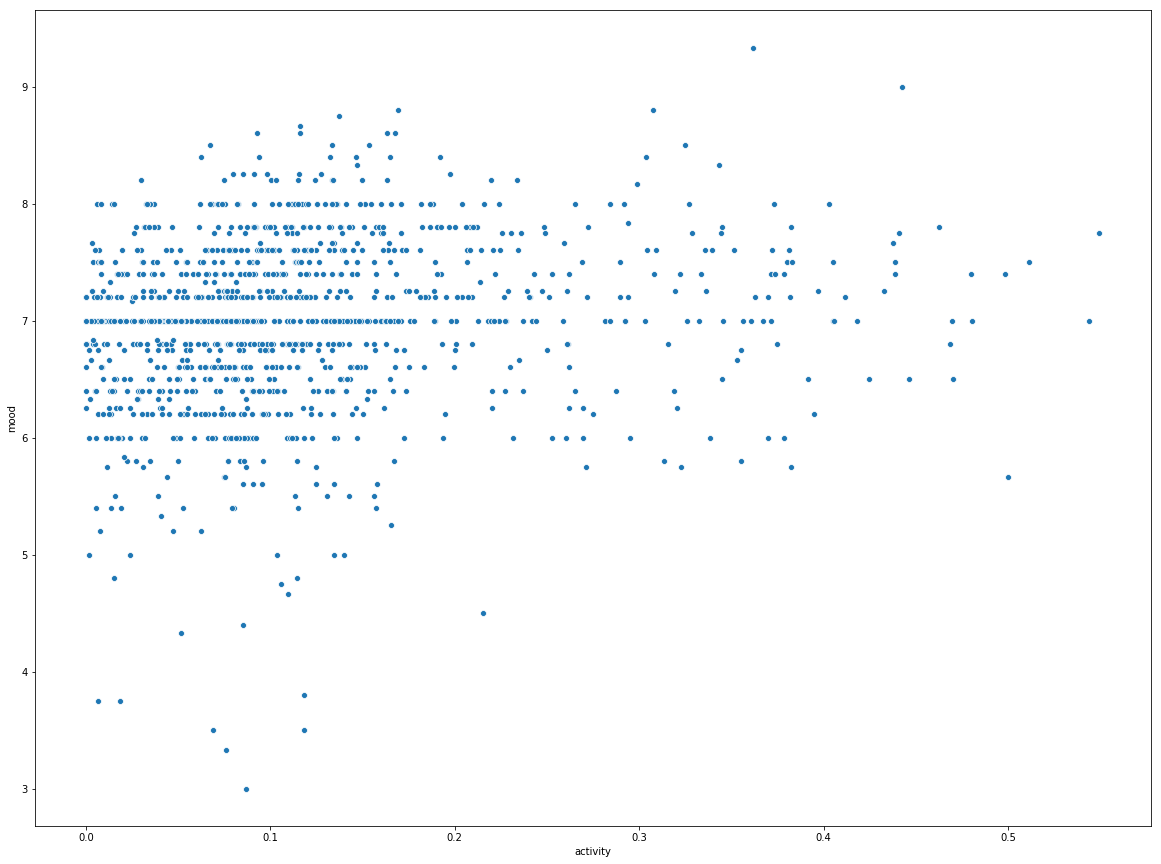

In [65]:
sns.scatterplot(x='activity', y='mood', data=df_daily)

,id,time,mood,arousal,valence,activity,screen,call,sms,builtin,...,entertainment,finance,game,office,other,social,travel,unknown,utilities,weather
0,AS14.01,2014-02-17,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AS14.01,2014-02-18,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AS14.01,2014-02-19,NaN,NaN,NaN,NaN,0.0,7.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AS14.01,2014-02-20,NaN,NaN,NaN,NaN,0.0,2.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AS14.01,2014-02-21,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


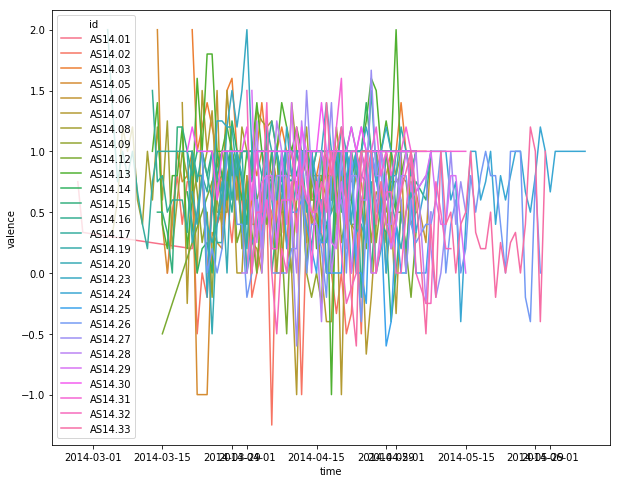

In [76]:
plt.rcParams['figure.figsize'] = [10, 8]
user_moods=sns.lineplot(x='time', y='valence', data=df_daily, hue='id')

## Transforming the data for training

In [6]:
df_training = pd.read_csv("data/trainingData.csv")

In [7]:
df_training.head()

,Unnamed: 0,mood,arousal,valence,activity,screen,call,sms,builtin,communication,...,other,social,travel,unknown,utilities,weather,avgValence,avgActivity,avgArousal,avgScreen
0,0,7.600000,0.400000,0.800000,0.126916,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.176667,0.126916,0.563333,0.0
1,1,7.200000,-1.000000,1.200000,0.057350,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.866667,0.057350,-0.200000,0.0
2,2,7.200000,0.800000,1.000000,0.126916,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.976667,0.126916,0.623333,0.0
3,3,7.333333,0.666667,0.666667,0.126916,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.843333,0.126916,0.623333,0.0
4,4,6.800000,-1.000000,0.600000,0.057350,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.920000,0.057350,-0.400000,0.0


In [12]:
from sklearn import tree
from sklearn.model_selection import train_test_split
clf = tree.DecisionTreeRegressor()

In [14]:
X = df_training[['avgValence', 'avgArousal', 'avgScreen']]
y = df_training['mood']

In [15]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
tree = clf.fit(X_train, y_train)

In [17]:
y_pred = tree.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
mean_squared_error(y_test, y_pred)

0.8757078236493373